# 4b. Texte einlesen und aufbereiten

In diesem Notebook schließen wir die Datenbeschaffung ab und explorieren das Textkorpus der Brüder Grimm von 1857.

## Inhalte
- Wir lesen die Textdateien des Korpus mit dem PlaintextCorpusReader ein
- Wir explorieren das Korpus mit dem nltk.Text Objekt
- Wir bereinigen das Vokabular des Korpus in mehreren Schritten
- Exkurs: Wir testen den HanoverTagger zum Part of Speech Tagging

In [1]:
import nltk
from reader import fairytale_corpus_reader

# imports "fairytale_corpus_reader" from separate file "reader.py"

## 1. Einlesen der Texte

In [2]:
?fairytale_corpus_reader.words

Signature: fairytale_corpus_reader.words(fileids=None)
Docstring:
:return: the given file(s) as a list of words
    and punctuation symbols.
:rtype: list(str)
File:      c:\ubexport\python\poetrycache\virtualenvs\textarbeit-mit-python-hhaa_esp-py3.10\lib\site-packages\nltk\corpus\reader\plaintext.py
Type:      method

In [3]:
# the method words() returns a list of all tokens, i.e.
# words and punctuation symbols in all files of the corpus
tokens = fairytale_corpus_reader.words()
tokens

['77', '.', 'Das', 'kluge', 'Grethel', '.', 'Es', ...]

In [4]:
# how many tokens are in the corpus?
len(tokens)

305258

In [5]:
# we create a nltk.Text object from the list of words
grimm_text = nltk.Text(tokens)
grimm_text

<Text: 77 . Das kluge Grethel . Es war...>

In [6]:
# we explore the vocabulary
grimm_text.vocab()

FreqDist({',': 22890, 'und': 11976, '.': 7515, '„': 6214, 'der': 5953, 'die': 5598, 'er': 4662, 'sie': 4230, 'das': 3358, 'den': 3268, ...})

In [7]:
# how many unique tokens are in the vocabulary?
len(grimm_text.vocab())

17534

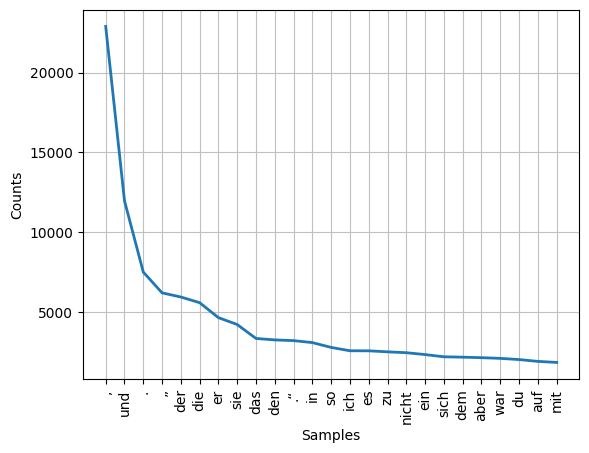

In [8]:
# plot the distribution of the top 25 most common tokens
grimm_text.plot(25);

## 2. Bereinigung des Vokabulars

In [9]:
# We create a helper function to create a Text object from a list of tokens
# the function print the number of tokens in the vocabulary and plots the 25 most common tokens


def summary(tokens):
    text = nltk.Text(tokens)
    print("Number of unique tokens:", len(text.vocab()))
    text.plot(25)

Number of unique tokens: 17534


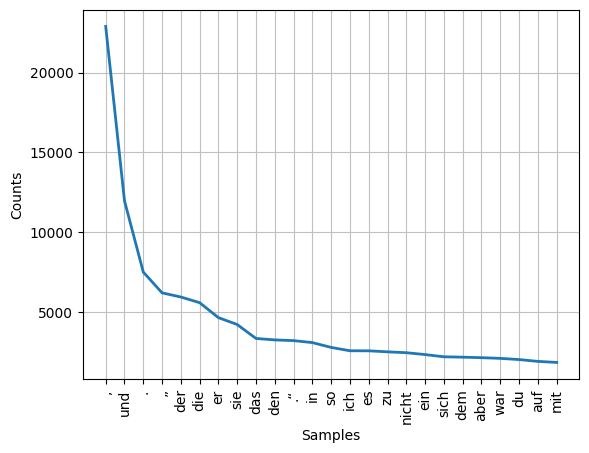

In [10]:
# We run the helper function on the tokens in the corpus
summary(tokens)

Number of unique tokens: 16535


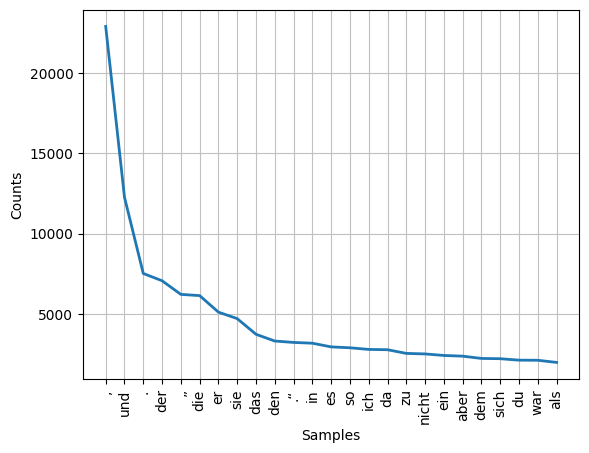

In [11]:
# we create a new list of lowercased tokens
# e.g. "Acht" -> "acht"
# we have fewer tokens in the vocabulary
tokens_lowercase = [token.lower() for token in tokens]
summary(tokens_lowercase)

In [12]:
# we download the stopwords lists using nltk
nltk.download("stopwords", quiet=True)

True

In [13]:
# a stopword is a word that occurs frequently in a language
# a stopword adds little to the understanding of a text and is often filtered out in text processing
# see: https://en.wikipedia.org/wiki/Stop_word

# example for german stopwords: "der", "die", "das", ...
german_stopwords = set(nltk.corpus.stopwords.words("german"))
# german_stopwords

Number of unique tokens: 16315


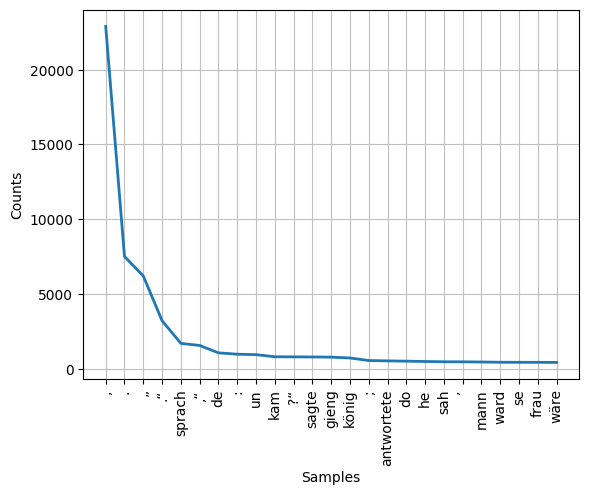

In [14]:
# we filter out stopwords from the wordlist
# we have fewer tokens in the vocabulary
# by comparing the plots we see, that "und", "der", "die" are gone
tokens_lowercase_no_stopwords = [
    token for token in tokens_lowercase if token not in german_stopwords
]
summary(tokens_lowercase_no_stopwords)

In [15]:
print("König".isalpha())
print("1".isalpha())
print(",".isalpha())
# depending on your analysis, you might want to keep compound words in the vocabulary
# in the fairytale corpus there are no compund words
print("Albrecht-Dürer-Straße".isalpha())

True
False
False
False


Number of unique tokens: 16073


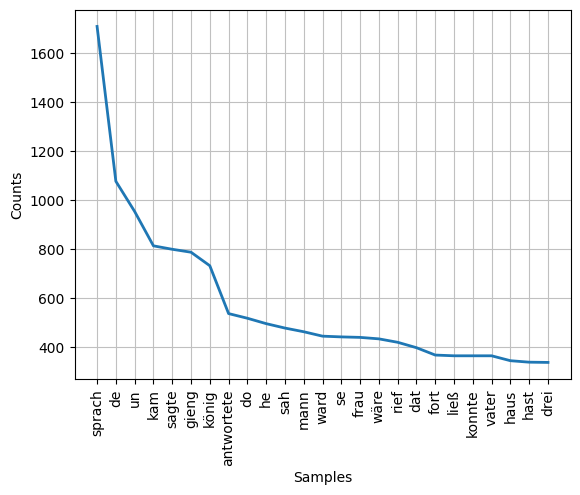

In [16]:
# we filter out punctuation, by using the method isalpha()
# we have fewer tokens in the vocabulary
# by comparing the plots we see, that ",", ".", "''" are gone
tokens_lowercase_no_stopwords_punctutation = [
    token for token in tokens_lowercase_no_stopwords if token.isalpha()
]
summary(tokens_lowercase_no_stopwords_punctutation)

In [17]:
# display the counts of the most common 25 tokens
nltk.Text(tokens_lowercase_no_stopwords_punctutation).vocab().most_common(25)

[('sprach', 1707),
 ('de', 1076),
 ('un', 953),
 ('kam', 813),
 ('sagte', 799),
 ('gieng', 787),
 ('könig', 732),
 ('antwortete', 537),
 ('do', 518),
 ('he', 496),
 ('sah', 478),
 ('mann', 463),
 ('ward', 445),
 ('se', 442),
 ('frau', 440),
 ('wäre', 434),
 ('rief', 420),
 ('dat', 398),
 ('fort', 368),
 ('ließ', 365),
 ('konnte', 365),
 ('vater', 365),
 ('haus', 345),
 ('hast', 339),
 ('drei', 338)]

## 3. Part-of-speech(PoS)-Tagging mit dem HanoverTagger

vgl.
- Paper: Wartena, Christian. A Probabilistic Morphology Model for German Lemmatization. 2019, p. 409 KB. DOI.org (Datacite), https://doi.org/10.25968/OPUS-1527.
- Code: https://github.com/wartaal/HanTa
- Demo-Notebook: https://github.com/wartaal/HanTa/blob/master/Demo.ipynb

In [18]:
from HanTa import HanoverTagger as ht

# load german language model
tagger = ht.HanoverTagger("morphmodel_ger.pgz")

The tagger requires a sentence a tokenized sentence (sequence of strings). With the method tag_sent() you can get the lemma and PoS of a token.

In [19]:
# Example of PoS tagging a demo sentence.
sentence = "Es war einmal ein König, der hatte eine Frau mit goldenen Haaren."
tokens = nltk.word_tokenize(sentence, language="german")

lemmata = tagger.tag_sent(tokens, taglevel=1)
lemmata

[('Es', 'es', 'PPER'),
 ('war', 'sein', 'VAFIN'),
 ('einmal', 'einmal', 'ADV'),
 ('ein', 'ein', 'ART'),
 ('König', 'König', 'NN'),
 (',', '--', '$,'),
 ('der', 'der', 'PRELS'),
 ('hatte', 'haben', 'VAFIN'),
 ('eine', 'eine', 'ART'),
 ('Frau', 'Frau', 'NN'),
 ('mit', 'mit', 'APPR'),
 ('goldenen', 'golden', 'ADJA'),
 ('Haaren', 'Haar', 'NN'),
 ('.', '--', '$.')]

In [20]:
# Example of PoS tagging a few sentences from the fairytale corpus.
for sentence in fairytale_corpus_reader.sents()[:5]:
    print("|".join(sentence))
    lemmata = tagger.tag_sent(sentence, taglevel=1)
    # filter lemmata from pos-tagged sentence by PoS tag "NN" (noun)
    # get the lemma of the token ("Haar" instead of "Haaren")
    nouns = [lemma[1] for lemma in lemmata if lemma[2] == "NN"]
    print(nouns)
    print()

77|.
[]

Das|kluge|Grethel|.
['Grethel']

Es|war|eine|Köchin|,|die|hieß|Grethel|,|die|trug|Schuhe|mit|rothen|Absätzen|,|und|wenn|sie|damit|ausgieng|,|so|drehte|sie|sich|hin|und|her|,|war|ganz|fröhlich|,|und|dachte|„|du|bist|doch|ein|schönes|Mädel|.“|Und|wenn|sie|nach|Haus|kam|,|so|trank|sie|aus|Fröhlichkeit|einen|Schluck|Wein|,|und|weil|der|Wein|auch|Lust|zum|Essen|macht|,|so|versuchte|sie|das|beste|,|was|sie|kochte|,|so|lang|,|bis|sie|satt|war|,|und|sprach|„|die|Köchin|muß|wissen|wies|Essen|schmeckt|.“
['Köchin', 'Schuh', 'Absatz', 'Mädel', 'Haus', 'Fröhlichkeit', 'Schluck', 'Wein', 'Wein', 'Lust', 'Essen', 'Köchin']

Es|trug|sich|zu|,|daß|der|Herr|einmal|zu|ihr|sagte|„|Grethel|,|heut|Abend|kommt|ein|Gast|,|richte|mir|zwei|Hühner|fein|wohl|zu|.“|„|Wills|schon|machen|,|Herr|,“|antwortete|Grethel|.
['Herr', 'Abend', 'Gast', 'Huhn', 'Herr']

Nun|stachs|die|Hühner|ab|,|brühte|sie|,|rupfte|sie|,|steckte|sie|an|den|Spieß|,|und|brachte|sie|,|wies|gegen|Abend|gieng|,|zum|Feuer|,|damit|sie|bra

In [25]:
# note: this cell's operation can take some time, depending on your machine
# get only nouns from fairytale corpus
all_nouns = []
for sentence in fairytale_corpus_reader.sents():
    lemmata = tagger.tag_sent(sentence, taglevel=1)
    nouns = [lemma[1] for lemma in lemmata if lemma[2] == "NN"]
    all_nouns.extend(nouns)

In [26]:
all_nouns[:25]

['Grethel',
 'Köchin',
 'Schuh',
 'Absatz',
 'Mädel',
 'Haus',
 'Fröhlichkeit',
 'Schluck',
 'Wein',
 'Wein',
 'Lust',
 'Essen',
 'Köchin',
 'Herr',
 'Abend',
 'Gast',
 'Huhn',
 'Herr',
 'Huhn',
 'Spieß',
 'Abend',
 'Feuer',
 'Huhn',
 'Gast',
 'Herr']

Number of unique tokens: 4036


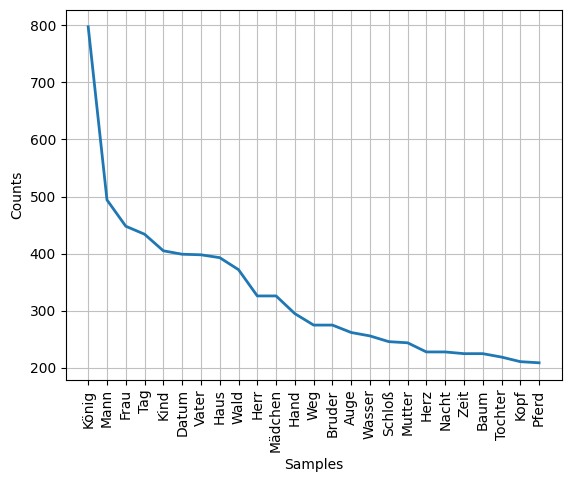

In [27]:
# we use only tokens, tagged by the HannoverTagger as nouns
# the results look promising, but use this carefully, because the language model is not trained on the fairytales language and grammar
summary(all_nouns)

In [24]:
import session_info

session_info.show()